In [5]:
! ls data/


BX-Police.csv     Sales.csv         budget-sample.csv
Iris.csv          Stocks.csv


# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


```py
import pandas as pd
import plotly.express as px
df = pd.read_csv('data/budget-sample.csv')

import matplotlib.pyplot as plt

df.head()
```

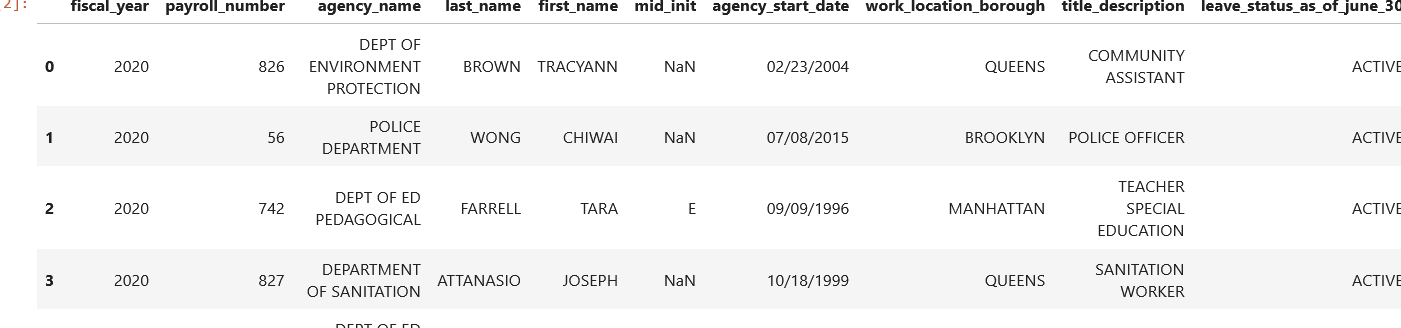

```py

fig = px.histogram(df, x= "base_salary")
fig.show()
```
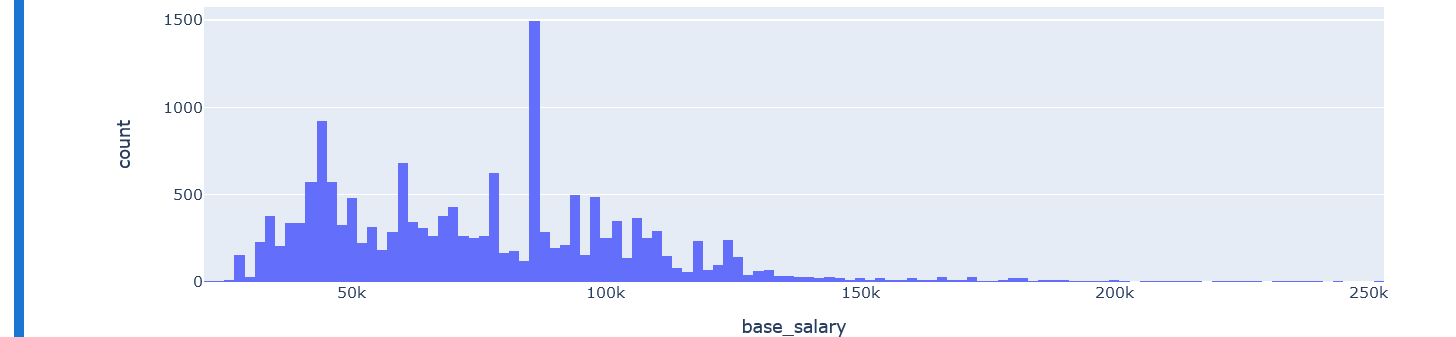

```py
fig = px.box(df, y="base_salary")
fig.show()
```

Boxplot Conclusion

This Tells you the distribution of the salaries. Median Salary is at73k

```py
gb = df.groupby("work_location_borough")
agg = gb["base_salary"].agg(["median", "mean"])
agg["disparity"]= agg["median"] - agg["mean"]
```

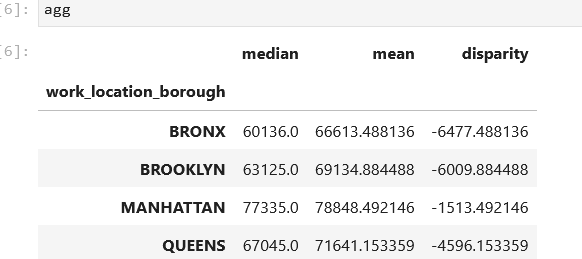


```py
gb = df.groupby("agency_name")
agg = gb["base_salary"].agg(["mean", "max", "median"])
agg
```
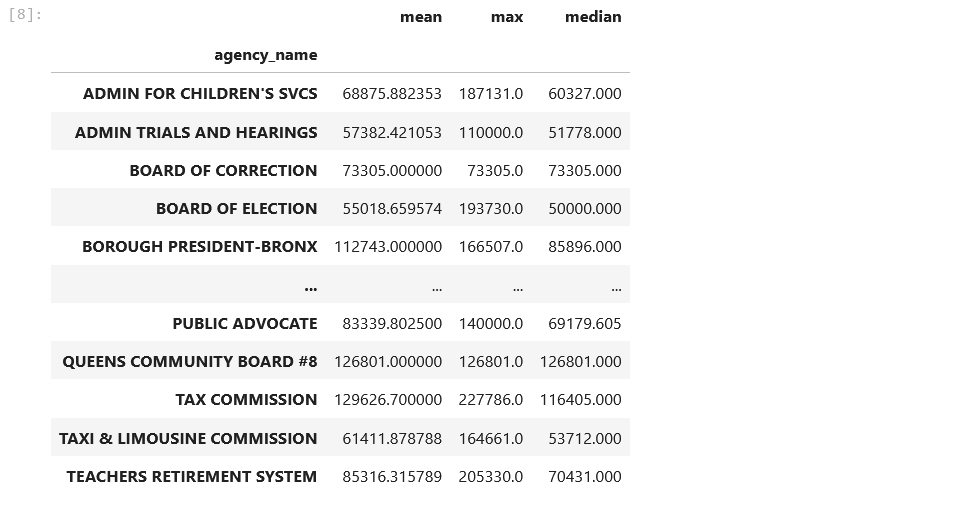



# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


```py
df = pd.read_csv('data/BX-Police.csv')
df.head()
```

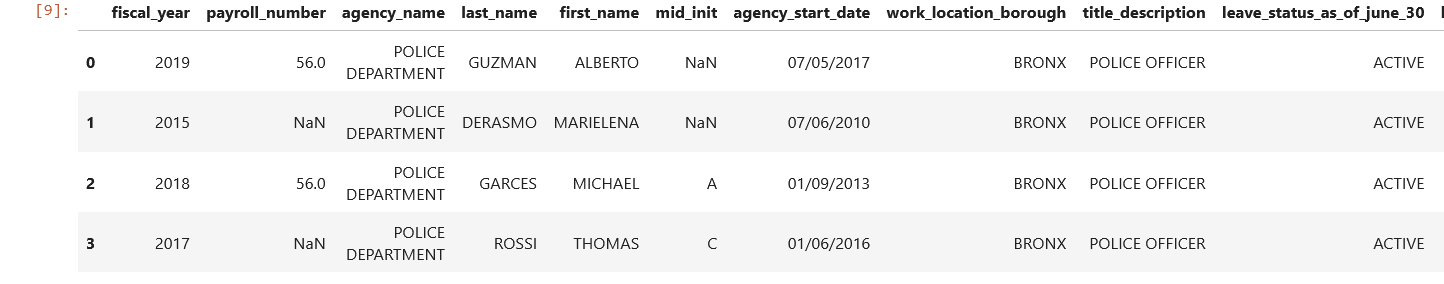

```py
gb = df.groupby('fiscal_year')
agg = gb['base_salary'].agg(["mean"], index=False)
MEAN_LABEL="Average Salary pay"
agg.columns = [MEAN_LABEL]
agg
```
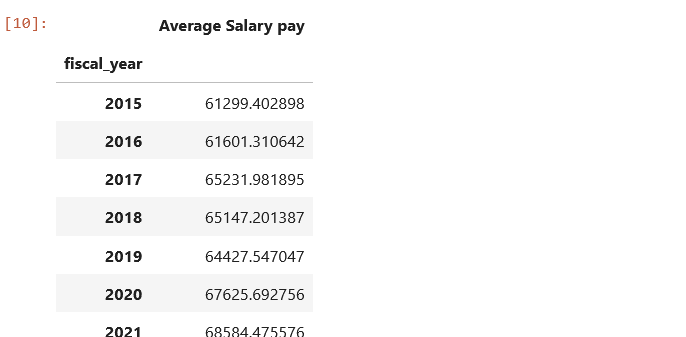


```py
fig = px.line(agg, x=agg.index, y=MEAN_LABEL, title='Average Base Salary over time')
fig.show()
```
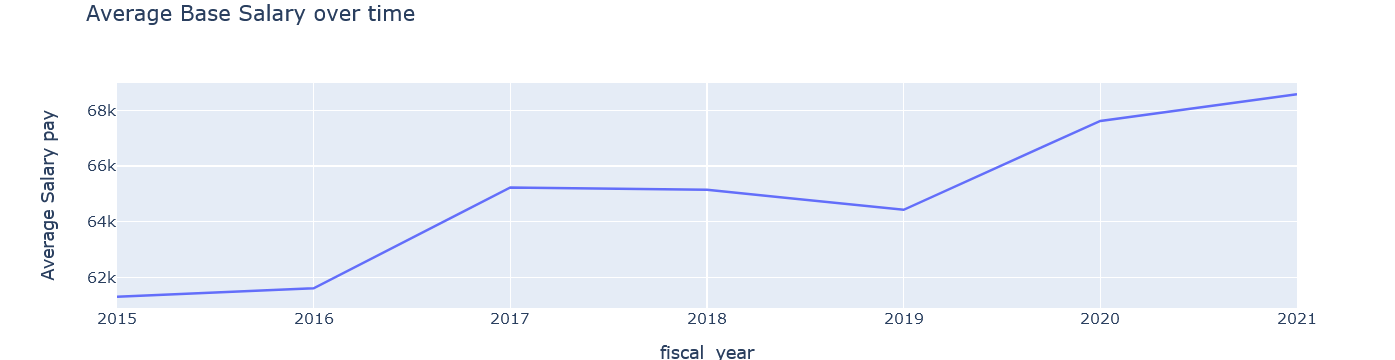

```py
InflationSince2015 = [0.1, 1.3, 2.1, 2.4, 1.8, 1.2, 4.7]
BASE_PAY = 61299.402898
len(InflationSince2015)
agg["inflation"] = InflationSince2015
aggAdded = [BASE_PAY]

for idx in range(len(InflationSince2015)-1):
    aggAdded.append(aggAdded[idx] * (1 + InflationSince2015[idx]/100))
    
aggAdded
```

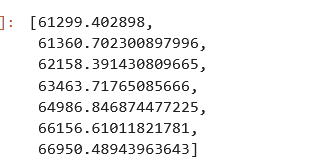

```py
agg["inflationPred"] = aggAdded
agg["year"] = agg.index
agg.columns
```

Index(['Average Salary pay', 'inflation', 'inflationPred', 'year'], dtype='object')

```
agg
```

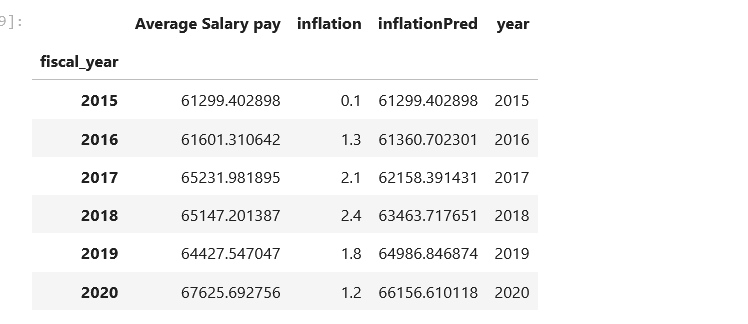



# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


```py
df = pd.read_csv('data/Sales.csv')
df.head()
```

```py
columns = list(df.columns)[1:]
columns

```

```py

fig, ax = plt.subplots()

for column in columns:
    df.plot(kind='line', x='Date', y='High', label = 'High', ax=ax)

```

```py


df.plot(kind='line', x='Date', y='Close', label = 'Close', ax=ax)
df.plot(kind='line', x='Date', y='Low', label = 'Low', ax=ax)
plt.legend()
plt.show()
```




# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


```py

```